In [4]:
import numpy as np
import pandas as pd
import datetime
from scipy import stats, integrate
import matplotlib.pyplot as plt
import plotly.plotly as py
import seaborn as sns
sns.set(color_codes=True)
pd.options.mode.chained_assignment = None 



In [7]:
mega_df

,date,jackpot,mega_ball,multiplier,winning_nums
0,"Tuesday, August 8, 2017",$350 Million,14,2.0,11 · 17 · 50 · 52 · 74
1,"Friday, August 4, 2017",$323 Million,4,5.0,09 · 17 · 25 · 63 · 71
2,"Tuesday, August 1, 2017",$303 Million,7,5.0,20 · 22 · 52 · 57 · 73
3,"Friday, July 28, 2017",$282 Million,11,3.0,04 · 06 · 31 · 49 · 52
4,"Tuesday, July 25, 2017",$262 Million,6,3.0,02 · 05 · 26 · 58 · 60
5,"Friday, July 21, 2017",$248 Million,10,4.0,18 · 31 · 36 · 50 · 74
6,"Tuesday, July 18, 2017",$232 Million,6,4.0,08 · 12 · 23 · 51 · 73
7,"Friday, July 14, 2017",$217 Million,1,4.0,11 · 12 · 24 · 32 · 73
8,"Tuesday, July 11, 2017",$202 Million,10,2.0,07 · 18 · 24 · 55 · 74
9,"Friday, July 7, 2017",$186 Million,10,5.0,02 · 09 · 11 · 28 · 60


In [5]:

# print(np.mean(mega_df.num1_prop), np.mean(mega_df.num2_prop), np.mean(mega_df.num3_prop), np.mean(mega_df.num4_prop), np.mean(mega_df.num5_prop))

np.mean(mega_df)

# mega_df.describe()
# mega_df.apply(lambda x: min(x), axis=0)

mega_ball     18.957038
multiplier     3.555113
dtype: float64

In [107]:
# Creating arrays with 10k trials for time periods 1, 2, and 3

n = 5
mega_n = 1
num_trials = 10000
num_trials_time1 = 1713
num_trials_time2 = 420
num_trials_time3 = 55

max_num_time1 = 56
max_num_time2 = 75
max_num_time3 = 70

max_mega_time1 = 46
max_mega_time2 = 15
max_mega_time3 = 25


# trials for time period 1
trial_gen_time1 = lambda: np.random.choice(range(1,max_num_time1+1), size=n, replace=False)
trial_time1 = list(map(lambda i: trial_gen_time1(), range(num_trials_time1)))
#trial_time1 = list(map(lambda i: trial_gen_time1(), range(num_trials)))

mega_gen_time1 = lambda: np.random.choice(range(1,max_mega_time1+1), size=mega_n)
mega_time1 = list(map(lambda i: mega_gen_time1(), range(num_trials_time1)))
#mega_time1 = list(map(lambda i: mega_gen_time1(), range(num_trials)))


# trials for time period 2
trial_gen_time2 = lambda: np.random.choice(range(1,max_num_time2+1), size=n, replace=False)
trial_time2 = list(map(lambda i: trial_gen_time2(), range(num_trials_time2)))
#trial_time2 = list(map(lambda i: trial_gen_time2(), range(num_trials)))

mega_gen_time2 = lambda: np.random.choice(range(1,max_mega_time2+1), size=mega_n)
mega_time2 = list(map(lambda i: mega_gen_time2(), range(num_trials_time2)))
#mega_time2 = list(map(lambda i: mega_gen_time2(), range(num_trials)))

# trials for time period 3
trial_gen_time3 = lambda: np.random.choice(range(1,max_num_time3+1), size=n, replace=False)
trial_time3 = list(map(lambda i: trial_gen_time3(), range(num_trials_time3)))
#trial_time3 = list(map(lambda i: trial_gen_time3(), range(num_trials)))

mega_gen_time3 = lambda: np.random.choice(range(1,max_mega_time3+1), size=mega_n)
mega_time3 = list(map(lambda i: mega_gen_time3(), range(num_trials_time3)))
#mega_time3 = list(map(lambda i: mega_gen_time3(), range(num_trials)))


# formatting trials variable in ascending order as reported by lotto
trial_sort_time1 = np.sort(trial_time1, axis=1)
trial_sort_time2 = np.sort(trial_time2, axis=1)
trial_sort_time3 = np.sort(trial_time3, axis=1)


In [87]:

# slicing trials into 5 different variables for comparison
#trial_num1 = trials_sorted[:, 0]
#trial_num2 = trials_sorted[:, 1]
#trial_num3 = trials_sorted[:, 2]
#trial_num4 = trials_sorted[:, 3]
#trial_num5 = trials_sorted[:, 4]

In [88]:

#x = trial_num1
#y = mega_df.num1_prop
#colors = (0,0,0)
#area = np.pi*3
 
# Plot
#plt.scatter(x, y, s=area, c=colors, alpha=0.5)
#plt.title('Scatter plot pythonspot.com')
#plt.xlabel('trial_num1')
#plt.ylabel('num1_prop')
#plt.show()

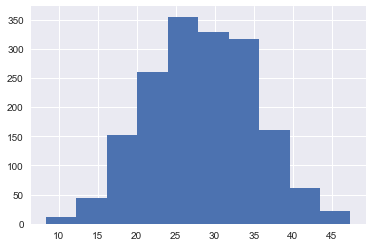

In [89]:


# MAIN DRAW - RANDOM SAMPLE
# Time period 1 random number trials
mean_trial_time1 = np.mean(trial_time1, axis=1)
n, bins, patches = plt.hist(mean_trial_time1)
plt.show()

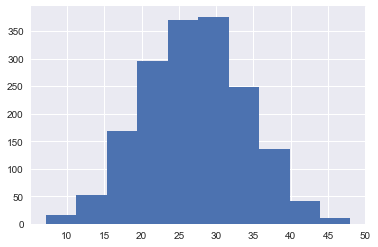

In [90]:

# MAIN DRAW - ACTUAL RESULTS
# Time period 1 lotto results # 1713 drawings
mean_num_list_prop_time1 = [np.mean(x) for x in mega1_df.num_list_prop]
n, bins, patches = plt.hist(mean_num_list_prop_time1)
plt.show()

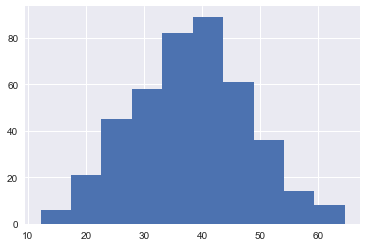

In [91]:

# MAIN DRAW - RANDOM SAMPLE
# Time period 2 random number trials
mean_trial_time2 = np.mean(trial_time2, axis=1)
n, bins, patches = plt.hist(mean_trial_time2)
plt.show()

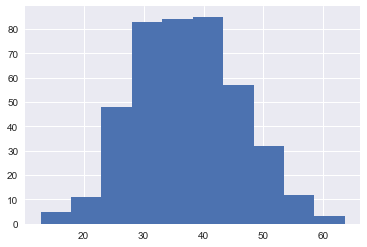

In [92]:

# MAIN DRAW - ACTUAL RESULTS
# Time period 2 lotto results # 420 drawings
mean_num_list_prop_time2 = [np.mean(x) for x in mega2_df.num_list_prop]
n, bins, patches = plt.hist(mean_num_list_prop_time2)
plt.show()

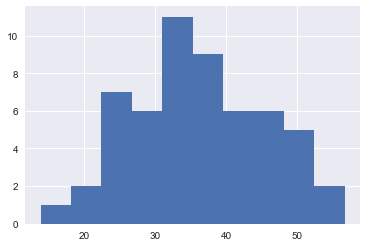

In [93]:

# MAIN DRAW - RANDOM SAMPLE
# Time period 3 random number trials
mean_trial_time3 = np.mean(trial_time3, axis=1)
n, bins, patches = plt.hist(mean_trial_time3)
plt.show()

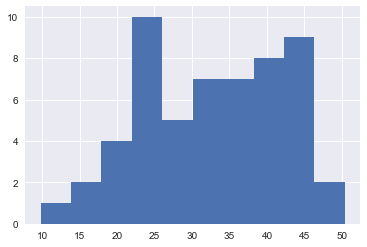

In [94]:

# MAIN DRAW - ACTUAL RESULTS
# Time period 3 lotto results # 55 drawings
mean_num_list_prop_time3 = [np.mean(x) for x in mega3_df.num_list_prop]
n, bins, patches = plt.hist(mean_num_list_prop_time3)
plt.show()

In [ ]:

# MEGA BALL - RANDOM SAMPLE
# Time period 1 random number trials for 
#n, bins, patches = plt.hist(mega_time1)
#plt.show()

<a list of 10 Patch objects>

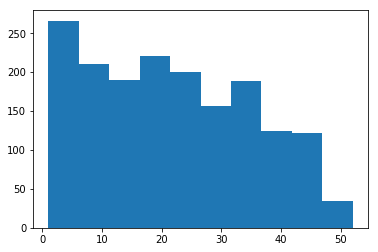

In [57]:

# MEGA BALL - ACTUAL RESULTS
# Time period 2 mega results # 1713 drawings
n, bins, patches = plt.hist(mega1_df.mega_ball)
plt.show()

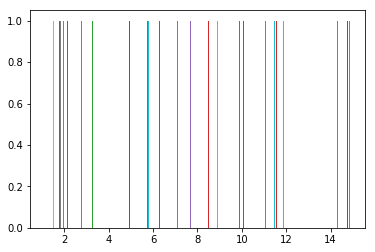

In [63]:

# MEGA BALL - RANDOM SAMPLE
# Time period 2 random number trials for 420 drawings
n, bins, patches = plt.hist(mega_time2)
plt.show()

In [ ]:
sns.distplot(x, kde=False, rug=True);


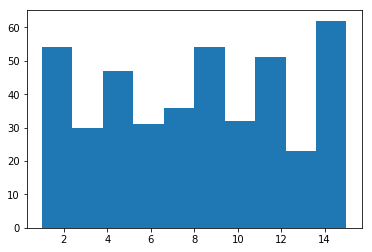

In [60]:

# MEGA BALL - ACTUAL RESULTS
# Time period 2 mega results # 420 drawings
n, bins, patches = plt.hist(mega2_df.mega_ball)
plt.show()

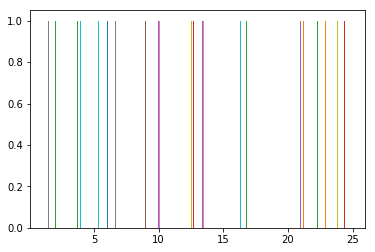

In [62]:

# MEGA BALL - RANDOM SAMPLE
# Time period 3 random number trials for 55 drawings
n, bins, patches = plt.hist(mega_time3)
plt.show()

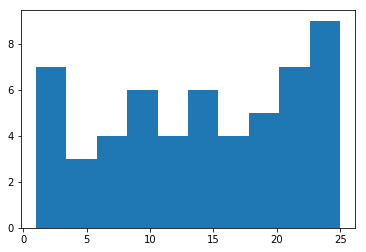

In [61]:

# MEGA BALL - ACTUAL RESULTS
# Time period 3 mega results # 55 drawings
n, bins, patches = plt.hist(mega3_df.mega_ball)
plt.show()

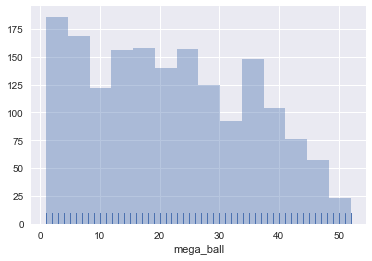

In [78]:
%matplotlib inline
sns.distplot(mega1_df.mega_ball, kde=False, rug=True);

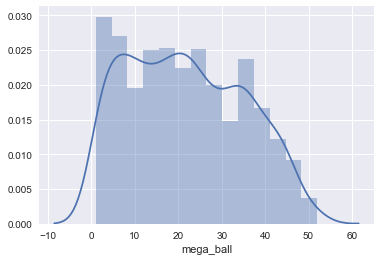

In [81]:

sns.distplot(mega1_df.mega_ball);

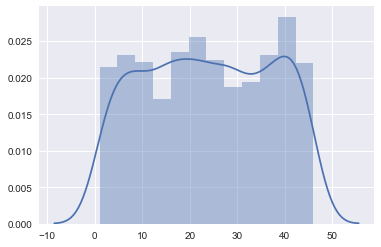

In [83]:
sns.distplot(mega_time1);

In [ ]:
sns.distplot(mega2_df.mega_ball, kde=False, rug=True);

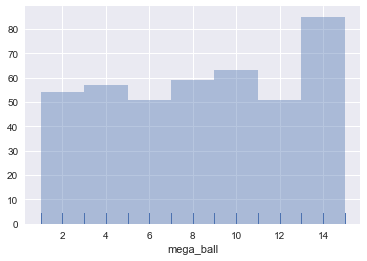

In [80]:
sns.distplot(mega2_df.mega_ball, kde=False, rug=True);

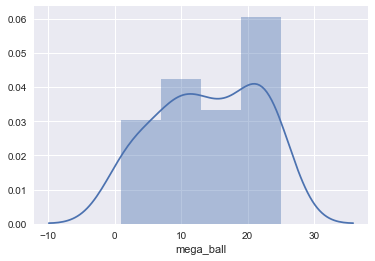

In [79]:

sns.distplot(mega3_df.mega_ball);

In [157]:
a = list(range(1,71))

In [158]:
np.mean(a)

35.5

In [242]:

# Add year, month and mean columns in mega1_df
year = mega1_df['date_prop'].dt.year
month = mega1_df['date_prop'].dt.month
mean1 = [np.mean(x) for x in mega1_df.num_list_prop]
exp_mean1 = np.ones(len(mega1_df.date_prop)) * (28.5)

mega1_df.insert(loc=7, column='num_mean', value = mean1)
mega1_df.insert(loc=8, column='exp_mean', value = exp_mean1)
mega1_df.insert(loc=9, column='year', value = year)
mega1_df.insert(loc=10, column='month', value = month)

In [243]:

# Add year, month and mean columns in mega2_df
year = mega2_df['date_prop'].dt.year
month = mega2_df['date_prop'].dt.month
mean2 = [np.mean(x) for x in mega2_df.num_list_prop]
exp_mean2 = np.ones(len(mega2_df.date_prop)) * (38)

mega2_df.insert(loc=7, column='num_mean', value = mean2)
mega2_df.insert(loc=8, column='exp_mean', value = exp_mean2)
mega2_df.insert(loc=9, column='year', value = year)
mega2_df.insert(loc=10, column='month', value = month)

In [244]:

# Add year, month and mean columns in mega3_df
year = mega3_df['date_prop'].dt.year
month = mega3_df['date_prop'].dt.month
mean3 = [np.mean(x) for x in mega3_df.num_list_prop]
exp_mean3 = np.ones(len(mega3_df.date_prop)) * (35.5)

mega3_df.insert(loc=7, column='num_mean', value = mean3)
mega3_df.insert(loc=8, column='exp_mean', value = exp_mean3)
mega3_df.insert(loc=9, column='year', value = year)
mega3_df.insert(loc=10, column='month', value = month)

In [245]:
pd.options.mode.chained_assignment = None 

# Add Above or Below mean column to the DataFrames

mega1_df.loc[mega1_df['num_mean'] > mega1_df['exp_mean'], 'mean_status'] = 'Above'
mega1_df.loc[mega1_df['num_mean'] == mega1_df['exp_mean'], 'mean_status'] = 'Same'
mega1_df.loc[mega1_df['num_mean'] < mega1_df['exp_mean'], 'mean_status'] = 'Below'


mega2_df.loc[mega2_df['num_mean'] > mega2_df['exp_mean'], 'mean_status'] = 'Above'
mega2_df.loc[mega2_df['num_mean'] == mega2_df['exp_mean'], 'mean_status'] = 'Same'
mega2_df.loc[mega2_df['num_mean'] < mega2_df['exp_mean'], 'mean_status'] = 'Below'


mega3_df.loc[mega3_df['num_mean'] > mega3_df['exp_mean'], 'mean_status'] = 'Above'
mega3_df.loc[mega3_df['num_mean'] == mega3_df['exp_mean'], 'mean_status'] = 'Same'
mega3_df.loc[mega3_df['num_mean'] < mega3_df['exp_mean'], 'mean_status'] = 'Below'


In [135]:
#mega1_df.to_csv("mega_time1", columns=None, header=True, index=False, index_label=None)

In [222]:
%matplotlib inline

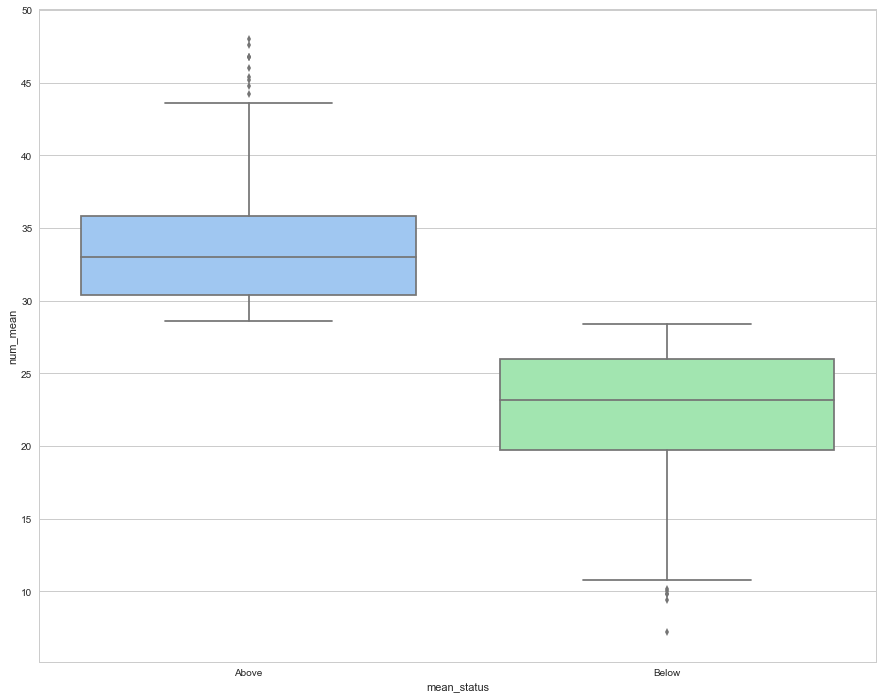

In [229]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.boxplot(x='mean_status', y='num_mean', data=mega1_df, orient='v')


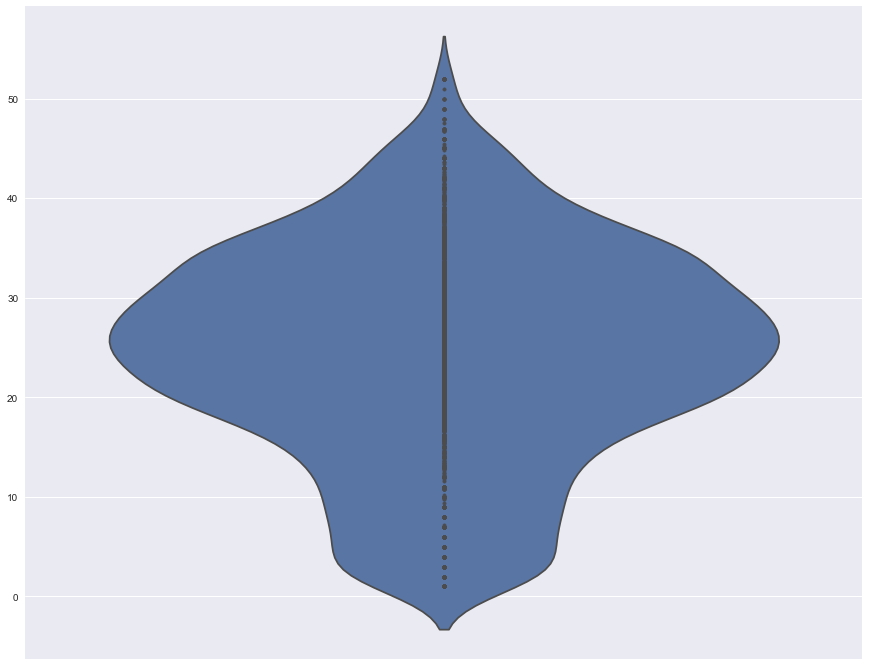

In [219]:


sns.violinplot([mega1_df.mega_ball, mega1_df.num_mean], inner="point", orient='v')

sns.set(rc={'figure.figsize':(15,12)})

Text(0.5,1,'Mean Value of Winning Numbers over Time')

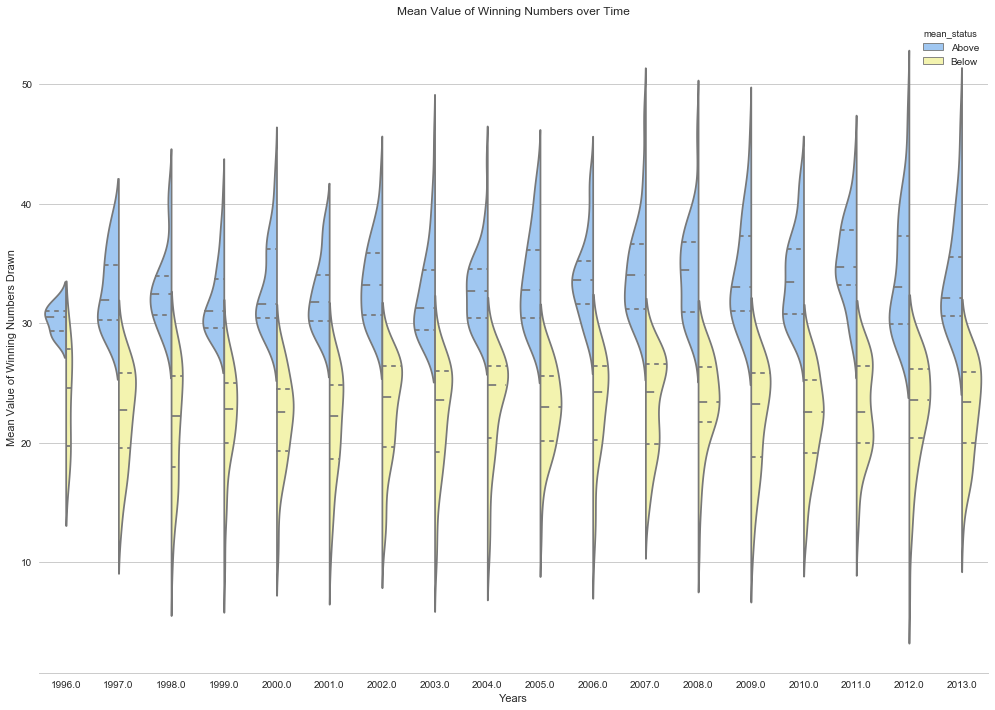

In [238]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
#mega1 = sns.load_dataset("mega1_df")

# Draw a nested violinplot and split the violins for easier comparison
fig, ax = plt.subplots()
sns.violinplot(x="year", y="num_mean", hue="mean_status", data=mega1_df, split=True,
               inner="quart", palette={"Above": "b", "Below": "y"}, ax=ax)
sns.despine(left=True)
fig.set_size_inches(17, 12)
plt.xlabel("Years")
plt.ylabel("Mean Value of Winning Numbers Drawn")
plt.title("Mean Value of Winning Numbers over Time")

Text(0.5,1,'Mega Millions: Mean Value of Results over Time')

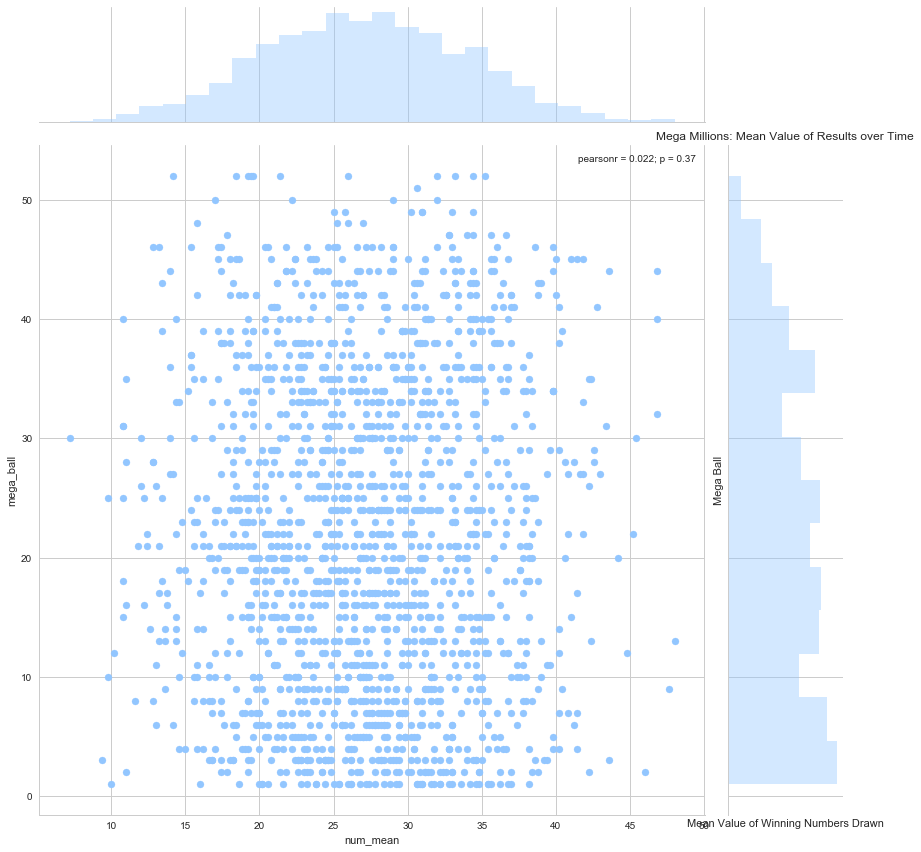

In [257]:
sns.jointplot(x="num_mean", y="mega_ball", data=mega1_df, size=12);
plt.ylabel("Mega Ball")
plt.xlabel("Mean Value of Winning Numbers Drawn")
plt.title("Mega Millions: Mean Value of Results over Time")

In [266]:
mega1_mean = mega1_df.num_mean.mean()
mega2_mean = mega2_df.num_mean.mean()
mega3_mean = mega3_df.num_mean.mean()

In [262]:
mega1_kurt = mega1_df.num_mean.kurtosis()
mega2_kurt = mega2_df.num_mean.kurtosis()
mega3_kurt = mega3_df.num_mean.kurtosis()

In [302]:
mega1_skew = mega1_df.num_mean.skew()
mega2_skew = mega2_df.num_mean.skew()
mega3_skew = mega3_df.num_mean.skew()

In [303]:
mega1_mean_exp = (56+1)/2
mega2_mean_exp = (75+1)/2
mega3_mean_exp = (70+1)/2

In [304]:
mega1_ball_mean = mega1_df.mega_ball.mean()
mega2_ball_mean = mega2_df.mega_ball.mean()
mega3_ball_mean = mega3_df.mega_ball.mean()

In [305]:
mega1_ball_mean_exp = (46+1)/2
mega2_ball_mean_exp = (15+1)/2
mega3_ball_mean_exp = (25+1)/2

In [306]:
mega1_ball_kurt = mega1_df.mega_ball.kurtosis()
mega2_ball_kurt = mega2_df.mega_ball.kurtosis()
mega3_ball_kurt = mega3_df.mega_ball.kurtosis()

In [307]:
mega1_ball_skew = mega1_df.mega_ball.skew()
mega2_ball_skew = mega2_df.mega_ball.skew()
mega3_ball_skew = mega3_df.mega_ball.skew()

In [313]:
mega2_skew

0.14492638123559182

In [314]:
mega3_ball_skew

-0.19831291620480324

In [315]:
mega1_skew

0.043402471892844512

In [246]:

pd.options.mode.chained_assignment = None 

# Add Rolling Average to DataFrames

mega1_df['num_mean_MA10'] = mega1_df.num_mean.rolling(window=10).mean()
mega1_df['num_mean_MA25'] = mega1_df.num_mean.rolling(window=25).mean()
mega1_df['num_mean_MA50'] = mega1_df.num_mean.rolling(window=50).mean()
mega1_df['num_mean_MA100'] = mega1_df.num_mean.rolling(window=100).mean()


mega2_df['num_mean_MA10'] = mega2_df.num_mean.rolling(window=10).mean()
mega2_df['num_mean_MA25'] = mega2_df.num_mean.rolling(window=25).mean()
mega2_df['num_mean_MA50'] = mega2_df.num_mean.rolling(window=50).mean()
mega2_df['num_mean_MA100'] = mega2_df.num_mean.rolling(window=100).mean()

mega3_df['num_mean_MA10'] = mega3_df.num_mean.rolling(window=10).mean()
mega3_df['num_mean_MA25'] = mega3_df.num_mean.rolling(window=25).mean()
mega3_df['num_mean_MA50'] = mega3_df.num_mean.rolling(window=50).mean()
mega3_df['num_mean_MA100'] = mega3_df.num_mean.rolling(window=100).mean()

In [249]:
mega1_df.to_csv("mega_time1", columns=None, header=True, index=False, index_label=None)
mega2_df.to_csv("mega_time2", columns=None, header=True, index=False, index_label=None)
mega3_df.to_csv("mega_time3", columns=None, header=True, index=False, index_label=None)

In [ ]:
"""""""""

importimport  plotly.plotlyplotly.p  as py
import plotly.graph_objs as go 

from datetime import datetime
import pandas_datareader as web

df = web.DataReader("aapl", 'yahoo',
                    datetime(2015, 1, 1),
                    datetime(2016, 7, 1))

trace_high = go.Scatter(x=df.index,
                        y=df.High,
                        name='High',
                        line=dict(color='#33CFA5'))

trace_high_avg = go.Scatter(x=df.index,
                            y=[df.High.mean()]*len(df.index),
                            name='High Average',
                            visible=False,
                            line=dict(color='#33CFA5', dash='dash'))

trace_low = go.Scatter(x=df.index,
                       y=df.Low,
                       name='Low',
                       line=dict(color='#F06A6A'))

trace_low_avg = go.Scatter(x=df.index,
                           y=[df.Low.mean()]*len(df.index),
                           name='Low Average',
                           visible=False,
                           line=dict(color='#F06A6A', dash='dash'))

data = [trace_high, trace_high_avg, trace_low, trace_low_avg]

high_annotations=[dict(x='2016-03-01',
                       y=df.High.mean(),
                       xref='x', yref='y',
                       text='High Average:<br>'+str(df.High.mean()),
                       ax=0, ay=-40),
                  dict(x=df.High.idxmax(),
                       y=df.High.max(),
                       xref='x', yref='y',
                       text='High Max:<br>'+str(df.High.max()),
                       ax=0, ay=-40)]
low_annotations=[dict(x='2015-05-01',
                      y=df.Low.mean(),
                      xref='x', yref='y',
                      text='Low Average:<br>'+str(df.Low.mean()),
                      ax=0, ay=40),
                 dict(x=df.High.idxmin(),
                      y=df.Low.min(),
                      xref='x', yref='y',
                      text='Low Min:<br>'+str(df.Low.min()),
                      ax=0, ay=40)]

updatemenus = list([
    dict(active=-1,
         buttons=list([   
            dict(label = 'High',
                 method = 'update',
                 args = [{'visible': [True, True, False, False]},
                         {'title': 'Yahoo High',
                          'annotations': high_annotations}]),
            dict(label = 'Low',
                 method = 'update',
                 args = [{'visible': [False, False, True, True]},
                         {'title': 'Yahoo Low',
                          'annotations': low_annotations}]),
            dict(label = 'Both',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         {'title': 'Yahoo',
                          'annotations': high_annotations+low_annotations}]),
            dict(label = 'Reset',
                 method = 'update',
                 args = [{'visible': [True, False, True, False]},
                         {'title': 'Yahoo',
                          'annotations': []}])
        ]),
    )
])

layout = dict(title='Yahoo', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')